In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기 및 개요 파악하기
basketball_df = pd.read_csv("Dataset/basketball_stat.csv")

print("data shape:", basketball_df.shape)
basketball_df.info()
basketball_df.describe()

data shape: (100, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


In [25]:
# 데이터 전처리
basketball_sorted = basketball_df.sort_values(by=['Pos'], ascending=False) # 'Pos' 기준으로 내림차순으로 정렬

basketball_2P_new = basketball_sorted['2P'] * (-1)
basketball_2P_new.name = '2P_new'

basketball_Pos_new = pd.Series([])
for i in basketball_sorted['Pos']:
    if i == 'SG': basketball_Pos_new[0][i] = 1
    else:
        basketball_Pos_new[0][i] = 0

basketball_sorted = pd.concat([basketball_sorted,basketball_2P_new],axis=1)
basketball_sorted

<ipython-input-25-b1708cdb087d>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  basketball_Pos_new = pd.Series([])


KeyError: 0

In [ ]:
# Position별 Boolean 인덱싱으로 numpy array 생성
SG = np.array(basketball_sorted[basketball_sorted["Pos"] == 'SG']) # Shooting Guard 인덱싱
C = np.array(basketball_sorted[basketball_sorted["Pos"] == 'C']) # Center 인덱싱

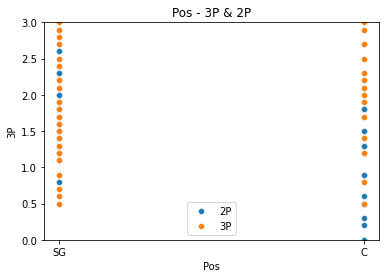

In [15]:
# Position별 3점, 2점 분포
sns.scatterplot(x='Pos', y='3P', data=basketball_sorted)
sns.scatterplot(x='Pos', y='2P', data=basketball_sorted)
plt.legend(['2P', '3P']) # 범례 표시
plt.ylim((0, 3)) # y축 구간을 0 ~ 3으로 scaling
plt.title("Pos - 3P & 2P")
plt.show()

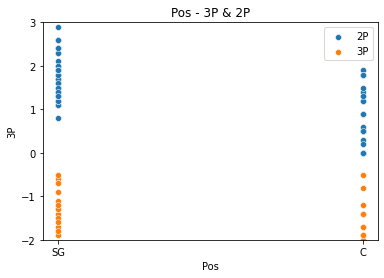

In [18]:
# Position별 3점, 2점 분포 / 3점 - y축(+), 2점 - y축(-)
sns.scatterplot(x='Pos', y='3P', data=basketball_sorted)
sns.scatterplot(x='Pos', y='2P_new', data=basketball_sorted)
plt.legend(['2P', '3P']) # 범례 표시
plt.ylim((-2, 3)) # y축 구간을 0 ~ 3으로 scaling
plt.title("Pos - 3P & 2P")
plt.show()

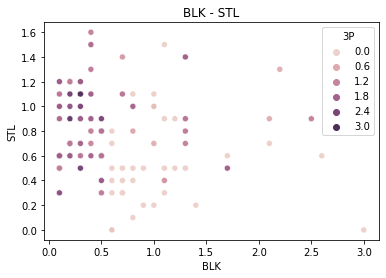

In [22]:
# Position별 3점, 2점 분포 / 3점 - y축(+), 2점 - y축(-)
sns.scatterplot(x='BLK', y='STL', data=basketball_sorted, hue="")
plt.xlabel('BLK')
plt.ylabel('STL')
plt.title('BLK - STL')
plt.show()